<a href="https://colab.research.google.com/github/sandylatte/IBM_DataAnalyst_Capstone_in_Python/blob/main/M2DataWrangling_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [3]:
# your code goes here
dup_df = df[df.duplicated()]
dup_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
1168,2339,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"5,000 to 9,999 employees","Developer, embedded applications or devices;De...",10,14,6,Very satisfied,Slightly satisfied,Somewhat confident,Yes,No,"I’m not actively looking, but I am open to new...",1-2 years ago,Write any code;Complete a take-home project;In...,Yes,Specific department or team I'd be working on;...,I had a negative experience or interaction at ...,USD,United States dollar,100000.0,Yearly,100000.0,45.0,There is a schedule and/or spec (made by me or...,Not enough people for the workload,A few days each month,Home,A little above average,"Yes, because I see value in code review",5.0,...,MariaDB;PostgreSQL;SQLite,Cassandra;MariaDB;PostgreSQL;Redis;SQLite,AWS;Docker;Linux;MacOS;Slack,Arduino;AWS;Docker;Kubernetes;Linux;MacOS;Rasp...,Express;React.js,Express;React.js;Spring;Vue.js,Node.js,Ansible;Apache Spark;Flutter;.NET Core;Node.js,Vim;Visual Studio Code,Linux-based,Development;Testing;Production;Outside of work...,Not at all,A passing fad,Yes,Yes,Yes,NaN,Online,Username,2011,Daily or almost daily,Find answers to specific questions;Contribute ...,1-2 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1169,2342,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,Some college/university study without earning ...,"Information systems, information technology, o...",Taken a part-time in-person course in programm...,20 to 99 employees,"Developer, full-stack",7,9,5,Very satisfied,Very satisfied,Somewhat confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,Solve a brain-teaser style puzzle,No,Financial performance or funding status of the...,I heard about a job opportunity (from a recrui...,GBP,Pound sterling,45000.0,Yearly,58881.0,40.0,There is a schedule and/or spec (made by me or...,Time spent commuting,A few days each month,Office,A little above average,"Yes, because I see value in code review",3.0,...,MariaDB;MySQL;Redis,MariaDB;MySQL;Redis,Android;Arduino;AWS;Linux;Raspberry Pi;Windows...,Linux;Windows,Angular/Angular.js;jQuery,Angular/Angular.js,Cordova;Node.js;TensorFlow,Node.js;TensorFlow,IntelliJ;Sublime Text,Windows,Development;Testing,Not at all,Useful for immutable record keeping outside of...,Yes,Yes,Yes,YouTube,Online,Username,2011,Daily or almost daily,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,Yes,"No, I've heard of them, but I am not part of a...","

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [4]:
# your code goes here
df_nodup = df.drop_duplicates()
df_nodup.shape

(11398, 85)

Verify if duplicates were actually dropped.


In [5]:
# your code goes here
df_nodup.duplicated

<bound method DataFrame.duplicated of        Respondent  ...                  SurveyEase
0               4  ...                        Easy
1               9  ...  Neither easy nor difficult
2              13  ...                        Easy
3              16  ...  Neither easy nor difficult
4              17  ...                        Easy
...           ...  ...                         ...
11547       25136  ...                   Difficult
11548       25137  ...  Neither easy nor difficult
11549       25138  ...                        Easy
11550       25141  ...                        Easy
11551       25142  ...                        Easy

[11398 rows x 85 columns]>

## Finding Missing values


Find the missing values for all columns.


In [6]:
# your code goes here
miss = df_nodup.isnull()

for column in miss.columns.values.tolist():
    print(column)
    print (miss[column].value_counts())
    print("")

Respondent
False    11398
Name: Respondent, dtype: int64

MainBranch
False    11398
Name: MainBranch, dtype: int64

Hobbyist
False    11398
Name: Hobbyist, dtype: int64

OpenSourcer
False    11398
Name: OpenSourcer, dtype: int64

OpenSource
False    11317
True        81
Name: OpenSource, dtype: int64

Employment
False    11398
Name: Employment, dtype: int64

Country
False    11398
Name: Country, dtype: int64

Student
False    11347
True        51
Name: Student, dtype: int64

EdLevel
False    11286
True       112
Name: EdLevel, dtype: int64

UndergradMajor
False    10661
True       737
Name: UndergradMajor, dtype: int64

EduOther
False    11234
True       164
Name: EduOther, dtype: int64

OrgSize
False    11302
True        96
Name: OrgSize, dtype: int64

DevType
False    11333
True        65
Name: DevType, dtype: int64

YearsCode
False    11389
True         9
Name: YearsCode, dtype: int64

Age1stCode
False    11385
True        13
Name: Age1stCode, dtype: int64

YearsCodePro
False    113

Find out how many rows are missing in the column 'WorkLoc'


In [7]:
# your code goes here
print (miss['WorkLoc'].value_counts())
print (miss['EdLevel'].value_counts())
print (miss['Country'].value_counts())
print (miss['ConvertedComp'].value_counts())

False    11366
True        32
Name: WorkLoc, dtype: int64
False    11286
True       112
Name: EdLevel, dtype: int64
False    11398
Name: Country, dtype: int64
False    10582
True       816
Name: ConvertedComp, dtype: int64


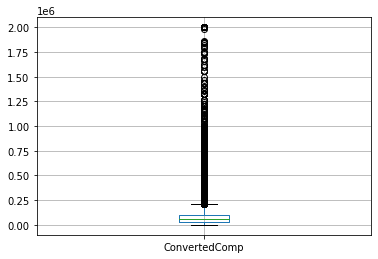

In [8]:
df_nodup[['ConvertedComp']].boxplot()

## Imputing missing values


Find the  value counts for the column WorkLoc.


In [9]:
# your code goes here
df_nodup['WorkLoc'].value_counts()

Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: WorkLoc, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [10]:
#make a note of the majority value here, for future reference
wl_mod = df_nodup['WorkLoc'].value_counts().max()
wl_mode = df_nodup['WorkLoc'][wl_mod]
wl_mode

'Office'

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [11]:
# your code goes here
import numpy as np
df_nodup['WorkLoc'].replace(np.nan, wl_mode, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [12]:
# your code goes here
df_nodup['WorkLoc'].isnull().value_counts()

False    11398
Name: WorkLoc, dtype: int64

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [13]:
# your code goes here
df_nodup = df.drop_duplicates()
df_nodup[['CompFreq']].value_counts()

CompFreq
Yearly      6073
Monthly     4788
Weekly       331
dtype: int64

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


In [14]:
df_nodup[['CompFreq', 'CompTotal']].head()

,CompFreq,CompTotal
0,Yearly,61000.0
1,Yearly,138000.0
2,Yearly,90000.0
3,Monthly,29000.0
4,Yearly,90000.0


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [15]:
# your code goes here

df_nodup.loc[df_nodup['CompFreq'] == 'Weekly', 'CompTotal'] = df_nodup['CompTotal'] * 52
df_nodup.loc[df_nodup['CompFreq'] == 'Monthly', 'CompTotal'] = df_nodup['CompTotal'] * 12

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [16]:
df_nodup['NormalizedAnnualCompensation'] = df_nodup['CompTotal']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_nodup[['CompFreq', 'CompTotal', 'NormalizedAnnualCompensation']].head()

,CompFreq,CompTotal,NormalizedAnnualCompensation
0,Yearly,61000.0,61000.0
1,Yearly,138000.0,138000.0
2,Yearly,90000.0,90000.0
3,Monthly,348000.0,348000.0
4,Yearly,90000.0,90000.0


In [18]:
df_nodup['NormalizedAnnualCompensation'].median()

100000.0

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
